# Artificial Intelligence exam project

Initial imports:

In [23]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import time
from utils import *
from heuristic_FD import *
from minihack import LevelGenerator
from nle import nethack

In [24]:
# Defines a room with fixed width and height and places objects in random locations
lvl_gen = LevelGenerator(w=15, h=15)
lvl_gen.add_object('dagger', ')') # weapon
lvl_gen.add_monster("goblin")  # monsters
#lvl_gen.add_monster("goblin")
#lvl_gen.add_monster("goblin")
lvl_gen.add_goal_pos() # final target

In [25]:
MOVEMENT_ACTIONS = tuple(nethack.CompassDirection)
OTHER_ACTIONS = MOVEMENT_ACTIONS + ( 
                nethack.Command.PICKUP,
                nethack.Command.WIELD 
                )

In [26]:
env = gym.make("MiniHack-Skill-Custom-v0", 
               observation_keys=("chars", "pixel"),
               des_file = lvl_gen.get_des(),
               actions = OTHER_ACTIONS,
               ) 
#"MiniHack-Room-Monster-15x15-v0"
state = env.reset()
env.render() 
print(env.actions)


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ..........o....                                 
                           

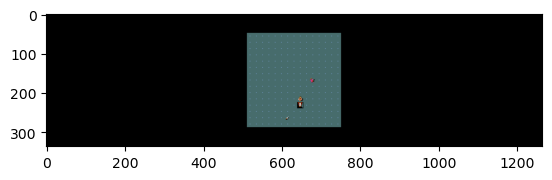

In [27]:
game_map = state['chars']
game = state['pixel']
plt.imshow(state['pixel'])

In [28]:
start = get_player_location(game_map)
end_target = get_target_location(game_map)
# weapon = get_weapon_location(game_map) 

print("Agent position:", start)
print("Target position:", end_target)
print("Monster position:", get_monster_location(game_map))
print("Weapon position:", get_weapon_location(game_map) )
print("Other actions:", OTHER_ACTIONS[8])
print("Other actions:", OTHER_ACTIONS[9])

Agent position: (13, 40)
Target position: (14, 40)
Monster position: [(10, 42)]
Weapon position: [(16, 38)]
Other actions: Command.PICKUP
Other actions: Command.WIELD


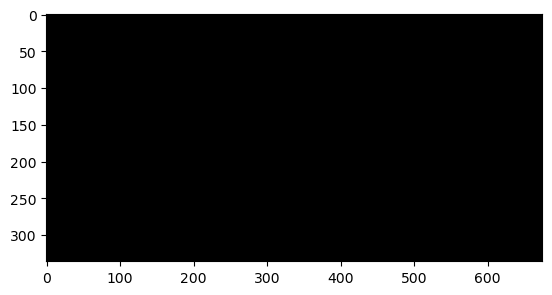

In [29]:
player_moves = [start]
image = plt.imshow(game[:, 300:975])

# finchè non arriviamo alla soluzione
end_state = False
weapons_in_inventory = 0
weapons_in_hand = 0
coord_weapons = get_weapon_location(game_map)
while not end_state:

    current_position = get_player_location(game_map)
    coord_monsters = get_monster_location(game_map)
    target = end_target
    
    print("My position: ", current_position,
        ", Weapon position: ", get_weapon_location(game_map), 
        ", Weapons in inventory: ", weapons_in_hand,
        ", Weapons in hand: ", weapons_in_hand)
    
    if weapons_in_inventory==0 and len(coord_weapons)!= 0 and current_position == coord_weapons[0] : #sono su un'arma
        print("I'm on a weapon")
        env.step(8) #prende l'arma
        weapons_in_inventory += 1
        #env.step(9) #equipaggia l'arma, non funziona e non so come mai si pianta
        #weapons_in_hand += 1
    
    if weapons_in_inventory==0 and len(coord_weapons)!=0 :
        target = coord_weapons[0]
    elif len(coord_monsters)!=0:
        target = coord_monsters[0]

    coord_weapons = get_weapon_location(game_map)

    moves = get_valid_moves(game_map,current_position) # lista mosse valide     
    coord = get_best_move(game_map, current_position, target, euclidean_distance)

    # stampa e aggiornamento passo
    game_map, _, end_state, _ = env.step(actions_from_path(current_position,[coord])[0])
    game_map = plot_map(game_map,image)
    
    player_moves.append(coord)